# Traffic Flow in Inclement Weather and Factors Affecting the Road Safety
 In this project, I will work with a dataset on the Road Accidents. The dataset can be downloaded from here:https://www.kaggle.com/search?q=road+accidents.
 Weather causes a variety of impacts on the transportation system. While severe winter storms, hurricanes, or floodings can result in major stoppages or evacuations of transportation systems and cost millions of dollars, day-to-day weather events such as rain, fog, snow, and freezing rain can have a serious impact on the mobility and safety of the transportation system users. These weather events can result in increased fuel consumption, delay, number of accidents, and significantly impact the performance of the transportation system. The overall goal of the project work undertaken in this project is to develop a better understanding of the impacts of weather on traffic flow.
Vehicle design and performance have two potential effects on safety: first, those aimed at reducing the risk of crashing; second, those aimed at reducing the consequences when accidents do occur. Vehicle mass, size and speed have long been important concerns for manufacturers and for safety analysts. While we may not be able to change the weather, we can have a better understanding regarding how certain weather events can affect road conditions. This knowledge allows us to be better prepared to stay safe while driving. However, rain, snow, falling temperature, high wind, and fog have a great effect on the road surface and driving conditions.

Comparing casual severity on weather condition and road surface (wet/damp) instead of dry road and counting how many of the accidents were on a wet/damp vs dry surface and the type of vehicle is the goal of this project. 

The analysis also produced more detailed, multidimensional analysis results that can be found in below report. The summaries and diagrams show how various parameters are influenced over a range of weather and traffic conditions.
 




In [1]:
#import necessary packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
import yellowbrick
from sklearn.model_selection import train_test_split #used to split data into training/test sets
from sklearn.metrics import plot_confusion_matrix

In [2]:
#check versions of packages
print('pandas version:', pd.__version__)
print('numpy version:', np.__version__)
print('scikit-learn version:', sklearn.__version__)
print('yellowbrick version:', yellowbrick.__version__)

pandas version: 1.3.1
numpy version: 1.21.1
scikit-learn version: 1.0.2
yellowbrick version: 1.4


## Exploring the Data

In [3]:
# Load the 'Road Accidents' data frame 
df1 = pd.read_excel('Road Accidents.xlsx') #reading file
df1.head()

,Reference Number,Easting,Northing,Number of Vehicles,Accident Date,Time (24hr),1st Road Class,Road Surface,Lighting Conditions,Weather Conditions,Casualty Class,Casualty Severity,Sex of Casualty,Age of Casualty,Type of Vehicle
0,110016014.0,443330.0,439205.0,2.0,2011-01-12,712.0,A(M),Wet / Damp,Darkness: street lighting unknown,Raining without high winds,Driver,Slight,Male,62.0,Car
1,110016024.0,425059.0,433371.0,2.0,2011-01-12,830.0,Unclassified,Wet / Damp,Daylight: street lights present,Raining without high winds,Driver,Slight,Female,39.0,Car
2,110016533.0,420683.0,434373.0,1.0,2011-01-12,1215.0,A,Wet / Damp,Daylight: street lights present,Fine without high winds,Pedestrian,Serious,Male,66.0,Car
3,110017112.0,431097.0,433000.0,1.0,2011-01-12,1735.0,A,Dry,Darkness: street lights present and lit,Fine without high winds,Pedestrian,Serious,Male,39.0,Goods vehicle 3.5 tonnes mgw and under
4,110020375.0,429523.0,433820.0,2.0,2011-01-12,1230.0,A,Dry,Daylight: street lights present,Fine without high winds,Driver,Slight,Male,29.0,Car


In [4]:
# drop '2526' column becouse missing value
df = df1.drop(df1.index[[2526]])

In [5]:
#display the dimensions of the dataframe
df.shape

(2603, 15)

In [6]:
df.columns

Index(['Reference Number', 'Easting', 'Northing', 'Number of Vehicles',
       'Accident Date', 'Time (24hr)', '1st Road Class', 'Road Surface',
       'Lighting Conditions', 'Weather Conditions', 'Casualty Class',
       'Casualty Severity', 'Sex of Casualty', 'Age of Casualty',
       'Type of Vehicle'],
      dtype='object')

### Observations

$\bullet$ The dataset has $2603$ rows and $15$ columns <br>
$\bullet$ Some of the columns will not be useful for model building, e.g., 'Reference Number', 'Easting', 'Northing' <br>
$\bullet$ There is a mix of numerical and categorical data <br>
$\bullet$ The target of the model will be 'Casualty Severity': $0$ means Slight; $1$ means Serious; $2$ means Fatal 

In [7]:
#look at the column data types
df.dtypes

Reference Number              float64
Easting                       float64
Northing                      float64
Number of Vehicles            float64
Accident Date          datetime64[ns]
Time (24hr)                   float64
1st Road Class                 object
Road Surface                   object
Lighting Conditions            object
Weather Conditions             object
Casualty Class                 object
Casualty Severity              object
Sex of Casualty                object
Age of Casualty               float64
Type of Vehicle                object
dtype: object

In [8]:
#get summary statistic of the numerical data
df.describe()

,Reference Number,Easting,Northing,Number of Vehicles,Time (24hr),Age of Casualty
count,2.603000e+03,2603.000000,2603.000000,2603.000000,2603.000000,2603.000000
mean,1.102816e+08,430128.834422,434240.341913,1.959662,1405.876681,35.296581
std,1.972090e+06,5118.805749,4381.483099,0.801316,508.858507,18.495206
min,1.100189e+07,415290.000000,424216.000000,1.000000,5.000000,0.000000
25%,1.101717e+08,427141.000000,431752.000000,2.000000,1044.000000,21.000000
50%,1.103125e+08,430100.000000,434223.000000,2.000000,1455.000000,32.000000
75%,1.104572e+08,432513.000000,436162.000000,2.000000,1750.000000,46.000000
max,1.200074e+08,444895.000000,449409.000000,8.000000,2355.000000,95.000000


In [9]:
#get summary statistics of the non-numerical data
df.describe(include = ['O'])

,1st Road Class,Road Surface,Lighting Conditions,Weather Conditions,Casualty Class,Casualty Severity,Sex of Casualty,Type of Vehicle
count,2603,2603,2603,2603,2603,2603,2603,2603
unique,5,3,5,7,3,3,2,15
top,Unclassified,Dry,Daylight: street lights present,Fine without high winds,Driver,Slight,Male,Car
freq,1215,2013,1931,2282,1551,2312,1545,1795


### Observations

$\bullet$ There is some missing data to deal with <br>
$\bullet$ Dropped row 2526 because of missing data

# graphical analysis creating

In [10]:
#only the column names specified will be put into the new sub df
df2 = (df[['Road Surface', 'Lighting Conditions', 'Weather Conditions', 'Casualty Severity']])
df2

,Road Surface,Lighting Conditions,Weather Conditions,Casualty Severity
0,Wet / Damp,Darkness: street lighting unknown,Raining without high winds,Slight
1,Wet / Damp,Daylight: street lights present,Raining without high winds,Slight
2,Wet / Damp,Daylight: street lights present,Fine without high winds,Serious
3,Dry,Darkness: street lights present and lit,Fine without high winds,Serious
4,Dry,Daylight: street lights present,Fine without high winds,Slight
...,...,...,...,...
2599,Wet / Damp,Daylight: street lights present,Raining without high winds,Slight
2600,Wet / Damp,Darkness: street lighting unknown,Raining without high winds,Slight
2601,Wet / Damp,Daylight: street lights present,Fine with high winds,Slight
2602,Dry,Daylight: street lights present,Fine without high winds,Slight


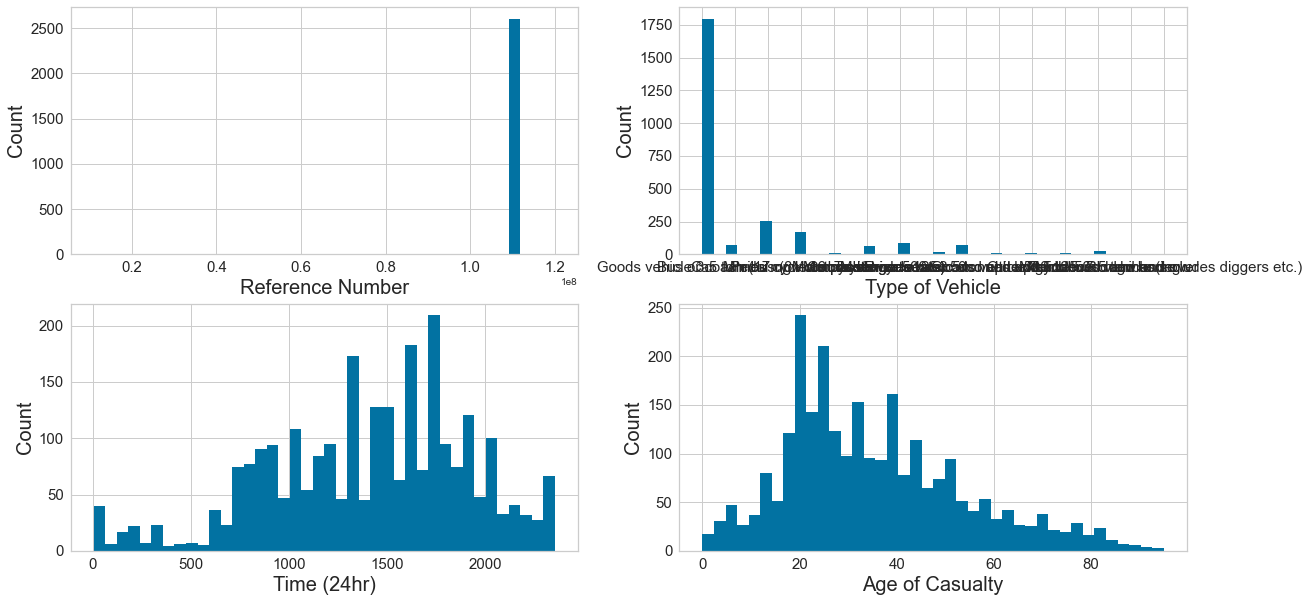

In [11]:
#get histograms of the numerical features
#set the figure size
plt.rcParams['figure.figsize'] = (20, 10)
# make subplots
fig, axes = plt.subplots(nrows = 2, ncols = 2)
# Specify the features of interest
num_features = ['Reference Number' ,'Type of Vehicle', 'Time (24hr)', 'Age of Casualty']
xaxes = num_features
yaxes = ['Count', 'Count', 'Count', 'Count']
# draw histograms
axes = axes.ravel()
for idx, ax in enumerate(axes):
    ax.hist(df[num_features[idx]].dropna(), bins=40)
    ax.set_xlabel(xaxes[idx], fontsize=20)
    ax.set_ylabel(yaxes[idx], fontsize=20)
    ax.tick_params(axis='both', labelsize=15)
plt.show()

### Observations

$\bullet$ Most 'Type of Vehicle' accident are car <br>
$\bullet$ Most 'Age of Casualty' accident reported between 20 to 30 years old <br>
$\bullet$ Most 'Time(24hrs)' accident happened in the evening between 12:00 to 18:00 o'clock <br>

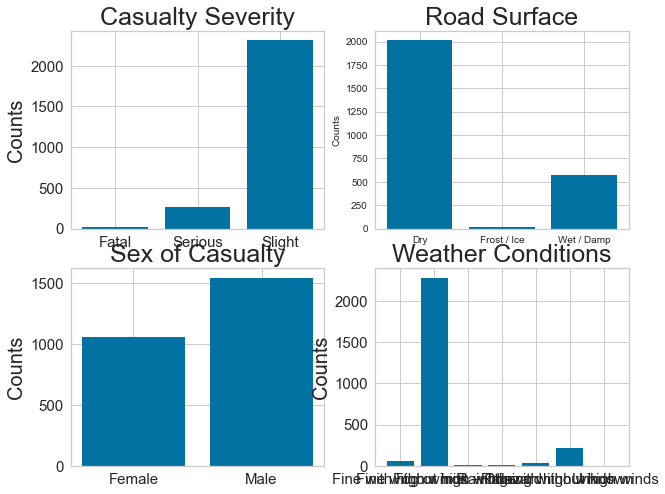

In [12]:
#create bar charts of some of the categorical features

#create a copy of the data frame for use with graphing
df_plots = df.copy()
#df_plots = df.replace({'Casualty Severity': {0: 'Slight', 1: 'Serious', 2: 'Fatal'}})
#df_plots = df_plots.replace({'Pclass': {1: '1st', 2: '2nd', 3: '3rd'}})
#df_plots = df.replace({'Sex of Casualty': {1: 'Fmale', 0: 'Male'}})
#df_plots = df_plots.replace({'Road Surface': {1: 'Dry', 2: 'Frost / Ice', 3: 'Wet / Damp'}})

#%matplotlib inline
plt.rcParams['figure.figsize'] = (10, 8)
# make subplots
fig, axes = plt.subplots(nrows = 2, ncols = 2)

# make the data read to feed into the visulizer
X_Casualty_Severity = df_plots.groupby('Casualty Severity').size().reset_index(name='Counts')['Casualty Severity']
Y_Casualty_Severity = df_plots.groupby('Casualty Severity').size().reset_index(name='Counts')['Counts']
# make the bar plot
axes[0, 0].bar(X_Casualty_Severity, Y_Casualty_Severity)
axes[0, 0].set_title('Casualty Severity', fontsize=25)
axes[0, 0].set_ylabel('Counts', fontsize=20)
axes[0, 0].tick_params(axis='both', labelsize=15)

# make the data read to feed into the visulizer
X_Road_Surface = df_plots.groupby('Road Surface').size().reset_index(name='Counts')['Road Surface']
Y_Road_Surface = df_plots.groupby('Road Surface').size().reset_index(name='Counts')['Counts']
# make the bar plot
axes[0, 1].bar(X_Road_Surface, Y_Road_Surface)
axes[0, 1].set_title('Road Surface', fontsize=25)
axes[0, 1].set_ylabel('Counts', fontsize=10)
axes[0, 1].tick_params(axis='both', labelsize=10)

# make the data read to feed into the visulizer
X_Sex_of_Casualty = df_plots.groupby('Sex of Casualty').size().reset_index(name='Counts')['Sex of Casualty']
Y_Sex_of_Casualty= df_plots.groupby('Sex of Casualty').size().reset_index(name='Counts')['Counts']
# make the bar plot
axes[1, 0].bar(X_Sex_of_Casualty, Y_Sex_of_Casualty)
axes[1, 0].set_title('Sex of Casualty', fontsize=25)
axes[1, 0].set_ylabel('Counts', fontsize=20)
axes[1, 0].tick_params(axis='both', labelsize=15)

# make the data read to feed into the visulizer
X_Weather_Conditions = df_plots.groupby('Weather Conditions').size().reset_index(name='Counts')['Weather Conditions']
Y_Weather_Conditions = df_plots.groupby('Weather Conditions').size().reset_index(name='Counts')['Counts']
# make the bar plot
axes[1, 1].bar(X_Weather_Conditions, Y_Weather_Conditions)
axes[1, 1].set_title('Weather Conditions', fontsize=25)
axes[1, 1].set_ylabel('Counts', fontsize=20)
axes[1, 1].tick_params(axis='both', labelsize=15)

plt.show()

### Observations

$\bullet$ Most passengers on the 'Road Accidents' data set got Slight <br>
$\bullet$ Most slight passengers were male <br>
$\bullet$ Most accident happened in dry road surface <br>
$\bullet$ Most accident recorded in Fine without high winds on 'weather conditions' situation <br>


In [13]:
import seaborn as sns

<AxesSubplot:>

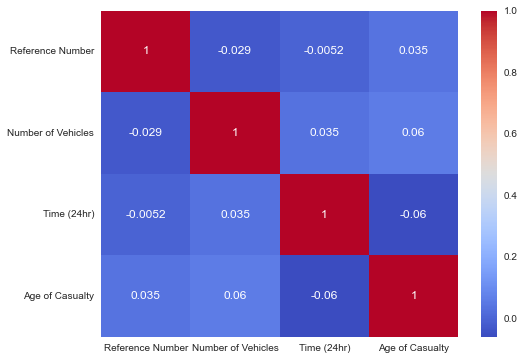

In [14]:
#Draw coorelation between various variables

plt.figure(figsize = (8,6))
sns.heatmap(df[['Reference Number', 'Number of Vehicles', 'Time (24hr)', 'Age of Casualty']].
            corr(), cmap = 'coolwarm', annot = True)

In [15]:
import numpy as np
from sklearn.preprocessing import FunctionTransformer

### Observations

$\bullet$ The numerical feature most highly correlated with 'Age of Casualty' is 'Time(24hrs)' <br>
$\bullet$ There is not significant collinearity between the features

Text(0.5, 1.0, 'Histogram of Casualty Severity')

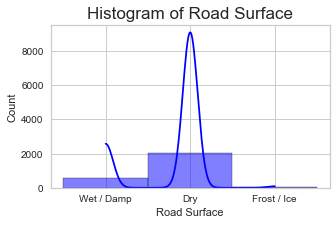

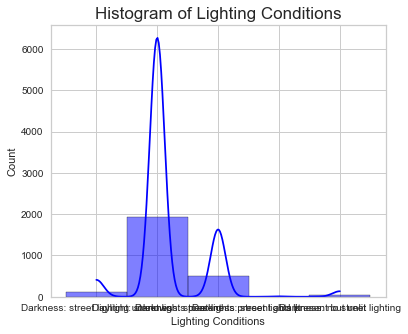

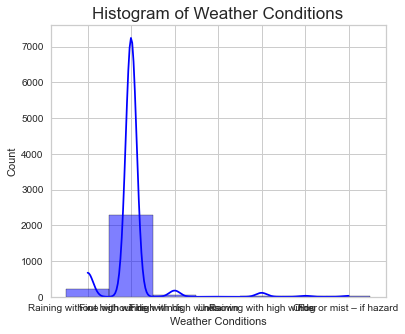

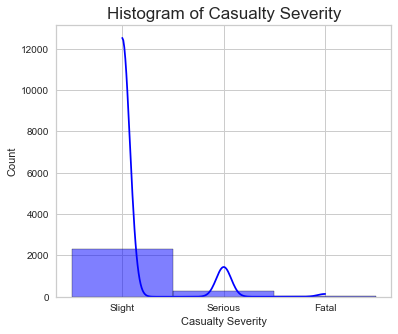

In [16]:
#Draw histogram of 4 main variables we are working with

plt.figure(figsize=(5,3))
sns.histplot(df['Road Surface'], kde = True, color = 'blue')
plt.title('Histogram of Road Surface', fontsize=17)

plt.figure(figsize=(6,5))
sns.histplot(df['Lighting Conditions'], kde = True, color = 'blue')
plt.title('Histogram of Lighting Conditions', fontsize=17)

plt.figure(figsize=(6,5))
sns.histplot(df['Weather Conditions'], kde = True, color = 'blue')
plt.title('Histogram of Weather Conditions', fontsize=17)

plt.figure(figsize=(6,5))
sns.histplot(df['Casualty Severity'], kde = True, color = 'blue')
plt.title('Histogram of Casualty Severity', fontsize=17)


### Observations

$\bullet$ Most passengers on the 'Road Accidents' data set got Slight <br>
$\bullet$ Most slight passengers were male <br>
$\bullet$ Most accident happened in dry road surface <br>
$\bullet$ Most accident recorded in Fine without high winds on 'weather conditions' situation <br>

# Milestone 2: Data Preparation

In [17]:
# convert the categorical columns to numerical columns 
categorical_columns = df.select_dtypes('object')
pd.get_dummies(df, columns = categorical_columns.columns)

,Reference Number,Easting,Northing,Number of Vehicles,Accident Date,Time (24hr),Age of Casualty,1st Road Class_A,1st Road Class_A(M),1st Road Class_B,...,Type of Vehicle_Goods vehicle over 3.5 tonnes and under 7.5 tonnes mgw,Type of Vehicle_M/cycle 50cc and under,Type of Vehicle_Minibus (8 – 16 passenger seats),Type of Vehicle_Motorcycle over 125cc and up to 500cc,Type of Vehicle_Motorcycle over 500cc,Type of Vehicle_Motorcycle over 50cc and up to 125cc,Type of Vehicle_Other Vehicle,Type of Vehicle_Pedal cycle,Type of Vehicle_Ridden horse,Type of Vehicle_Taxi/Private hire car
0,110016014.0,443330.0,439205.0,2.0,2011-01-12,712.0,62.0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,110016024.0,425059.0,433371.0,2.0,2011-01-12,830.0,39.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,110016533.0,420683.0,434373.0,1.0,2011-01-12,1215.0,66.0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,110017112.0,431097.0,433000.0,1.0,2011-01-12,1735.0,39.0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,110020375.0,429523.0,433820.0,2.0,2011-01-12,1230.0,29.0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2599,110592051.0,428984.0,435435.0,1.0,2011-12-31,1305.0,10.0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2600,110592833.0,428058.0,432860.0,1.0,2011-12-31,128.0,17.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2601,110593050.0,435402.0,436161.0,1.0,2011-12-31,1000.0,79.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2602,110593522.0,431237.0,434797.0,2.0,2011-12-31,1445.0,24.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [18]:
#Convert the categorical features into dummy variables.
# create dummy variables  
pd.get_dummies(df)

,Reference Number,Easting,Northing,Number of Vehicles,Accident Date,Time (24hr),Age of Casualty,1st Road Class_A,1st Road Class_A(M),1st Road Class_B,...,Type of Vehicle_Goods vehicle over 3.5 tonnes and under 7.5 tonnes mgw,Type of Vehicle_M/cycle 50cc and under,Type of Vehicle_Minibus (8 – 16 passenger seats),Type of Vehicle_Motorcycle over 125cc and up to 500cc,Type of Vehicle_Motorcycle over 500cc,Type of Vehicle_Motorcycle over 50cc and up to 125cc,Type of Vehicle_Other Vehicle,Type of Vehicle_Pedal cycle,Type of Vehicle_Ridden horse,Type of Vehicle_Taxi/Private hire car
0,110016014.0,443330.0,439205.0,2.0,2011-01-12,712.0,62.0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,110016024.0,425059.0,433371.0,2.0,2011-01-12,830.0,39.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,110016533.0,420683.0,434373.0,1.0,2011-01-12,1215.0,66.0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,110017112.0,431097.0,433000.0,1.0,2011-01-12,1735.0,39.0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,110020375.0,429523.0,433820.0,2.0,2011-01-12,1230.0,29.0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2599,110592051.0,428984.0,435435.0,1.0,2011-12-31,1305.0,10.0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2600,110592833.0,428058.0,432860.0,1.0,2011-12-31,128.0,17.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2601,110593050.0,435402.0,436161.0,1.0,2011-12-31,1000.0,79.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2602,110593522.0,431237.0,434797.0,2.0,2011-12-31,1445.0,24.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [19]:
df.columns

Index(['Reference Number', 'Easting', 'Northing', 'Number of Vehicles',
       'Accident Date', 'Time (24hr)', '1st Road Class', 'Road Surface',
       'Lighting Conditions', 'Weather Conditions', 'Casualty Class',
       'Casualty Severity', 'Sex of Casualty', 'Age of Casualty',
       'Type of Vehicle'],
      dtype='object')

In [20]:
#drop any features that are not useful for your model building and explain why they are not useful.
#drop the columns Reference Number, Easting, Northing, and Accident Date as they are not useful for model building
#drop Casualty Severity from the features as it is the target
X = df.drop(['Casualty Severity', 'Reference Number', 'Easting', 'Northing', 'Accident Date'], axis = 1)
#get the target
y = df['Casualty Severity']
#split the data into training and test sets
#split the data into training and test sets (80% Training/20% Test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

#reset indices in the training and test sets to prevent pandas slicing warnings
X_train = X_train.reset_index(drop = True) #drop + True drops the previous index
X_test = X_test.reset_index(drop = True)
y_train = y_train.reset_index(drop = True)
y_test = y_test.reset_index(drop = True)
X

,Number of Vehicles,Time (24hr),1st Road Class,Road Surface,Lighting Conditions,Weather Conditions,Casualty Class,Sex of Casualty,Age of Casualty,Type of Vehicle
0,2.0,712.0,A(M),Wet / Damp,Darkness: street lighting unknown,Raining without high winds,Driver,Male,62.0,Car
1,2.0,830.0,Unclassified,Wet / Damp,Daylight: street lights present,Raining without high winds,Driver,Female,39.0,Car
2,1.0,1215.0,A,Wet / Damp,Daylight: street lights present,Fine without high winds,Pedestrian,Male,66.0,Car
3,1.0,1735.0,A,Dry,Darkness: street lights present and lit,Fine without high winds,Pedestrian,Male,39.0,Goods vehicle 3.5 tonnes mgw and under
4,2.0,1230.0,A,Dry,Daylight: street lights present,Fine without high winds,Driver,Male,29.0,Car
...,...,...,...,...,...,...,...,...,...,...
2599,1.0,1305.0,A,Wet / Damp,Daylight: street lights present,Raining without high winds,Pedestrian,Male,10.0,Car
2600,1.0,128.0,Unclassified,Wet / Damp,Darkness: street lighting unknown,Raining without high winds,Passenger,Male,17.0,Car
2601,1.0,1000.0,Unclassified,Wet / Damp,Daylight: street lights present,Fine with high winds,Passenger,Female,79.0,Bus or coach (17 or more passenger seats)
2602,2.0,1445.0,Unclassified,Dry,Daylight: street lights present,Fine without high winds,Driver,Male,24.0,Car


In [21]:
y

0        Slight
1        Slight
2       Serious
3       Serious
4        Slight
         ...   
2599     Slight
2600     Slight
2601     Slight
2602     Slight
2603    Serious
Name: Casualty Severity, Length: 2603, dtype: object

In [22]:
#show the sizes of the training and test sets
print(X_train.shape)
print(X_test.shape)
#see how many slight, serious, and fatal are in training and test sets
print(y_train.value_counts())
print(y_test.value_counts())

(2082, 10)
(521, 10)
Slight     1846
Serious     215
Fatal        21
Name: Casualty Severity, dtype: int64
Slight     466
Serious     51
Fatal        4
Name: Casualty Severity, dtype: int64


In [23]:
#look for missing data in the training and test sets
print(X_train.isna().sum())
print(X_test.isna().sum())

Number of Vehicles     0
Time (24hr)            0
1st Road Class         0
Road Surface           0
Lighting Conditions    0
Weather Conditions     0
Casualty Class         0
Sex of Casualty        0
Age of Casualty        0
Type of Vehicle        0
dtype: int64
Number of Vehicles     0
Time (24hr)            0
1st Road Class         0
Road Surface           0
Lighting Conditions    0
Weather Conditions     0
Casualty Class         0
Sex of Casualty        0
Age of Casualty        0
Type of Vehicle        0
dtype: int64


### There is no more missing data 

In [24]:
df.columns

Index(['Reference Number', 'Easting', 'Northing', 'Number of Vehicles',
       'Accident Date', 'Time (24hr)', '1st Road Class', 'Road Surface',
       'Lighting Conditions', 'Weather Conditions', 'Casualty Class',
       'Casualty Severity', 'Sex of Casualty', 'Age of Casualty',
       'Type of Vehicle'],
      dtype='object')

In [25]:
#create a column for the log of the Number of Vehicles to reduce skew
#this is not totally necessary, but it is good to know how to log-transform variables
X_train['log_Number_of_Vehicles'] = np.log1p(X_train['Number of Vehicles'])
X_test['log_Number_of_Vehicles'] = np.log1p(X_test['Number of Vehicles'])

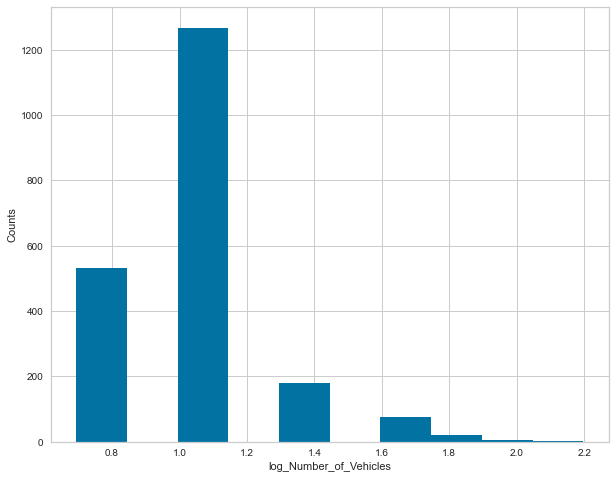

In [26]:
#look at a histogram of log_Number_of_Vehicles
X_train['log_Number_of_Vehicles'].hist()
plt.xlabel('log_Number_of_Vehicles')
plt.ylabel('Counts')
plt.show()

In [27]:
#create a new dataframe without 'Number of Vehicles' column
X_train.drop('Number of Vehicles', axis = 1, inplace = True)
X_test.drop('Number of Vehicles', axis = 1, inplace = True)

In [28]:
#create dummy variables for the categorical columns 
X_train = X_train.replace({'Pclass': {1: '1st', 2: '2nd', 3: '3rd'}})
X_test = X_test.replace({'Pclass': {1: '1st', 2: '2nd', 3: '3rd'}})
#get dummy variables for the categorical columns dropping the first dummy variable
#we drop the first dummy variable, so we get one fewer than the number of categories
#this prevents collinearity between the dummy variables
X_train = pd.get_dummies(X_train, drop_first = True)
X_test = pd.get_dummies(X_test, drop_first = True)

In [29]:
#check dimensions of the training and test feature matrices
print(X_train.shape)
print(X_test.shape)
#view the training features
X_train.head()

(2082, 36)
(521, 33)


,Time (24hr),Age of Casualty,log_Number_of_Vehicles,1st Road Class_A(M),1st Road Class_B,1st Road Class_Motorway,1st Road Class_Unclassified,Road Surface_Frost / Ice,Road Surface_Wet / Damp,Lighting Conditions_Darkness: street lighting unknown,...,Type of Vehicle_Goods vehicle over 3.5 tonnes and under 7.5 tonnes mgw,Type of Vehicle_M/cycle 50cc and under,Type of Vehicle_Minibus (8 – 16 passenger seats),Type of Vehicle_Motorcycle over 125cc and up to 500cc,Type of Vehicle_Motorcycle over 500cc,Type of Vehicle_Motorcycle over 50cc and up to 125cc,Type of Vehicle_Other Vehicle,Type of Vehicle_Pedal cycle,Type of Vehicle_Ridden horse,Type of Vehicle_Taxi/Private hire car
0,1545.0,41.0,1.609438,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,1833.0,8.0,1.098612,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,1425.0,61.0,1.098612,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,656.0,24.0,1.098612,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1915.0,30.0,1.098612,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Summary of Data Preparation Steps

$\bullet$ Dropped unnecessary data <br>
$\bullet$ Filled in missing data <br>
$\bullet$ Replaced fare price with its log; verified the data is more "normal" <br>
$\bullet$ Created dummy variables for the categorical data <br>
$\bullet$ Split data into training and test sets

In [30]:
#create a engineer features
#add 'Road Surface', 'Lighting Conditions', 'Weather Conditions' to creata a new column
#X_train['new_feature'] = X_train['Road Surface'] + X_train['Lighting Conditions'] + X_train['Weather Conditions']
#X_train.head()

# Milestone 3: Model Building and Evaluation

In [31]:

#load libraries
from sklearn import neighbors
knn = neighbors.KNeighborsClassifier(n_neighbors=5)
from sklearn.neighbors import KNeighborsClassifier
from sklearn import datasets

from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler 
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline, FeatureUnion 
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline


In [32]:
#import logistic regression model
from sklearn.linear_model import LogisticRegression

#import evaluation tools
from yellowbrick.classifier import ConfusionMatrix
from yellowbrick.classifier import ClassificationReport
from yellowbrick.classifier import ROCAUC

In [33]:
#from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(sparse=False)

In [34]:
df.isnull().any()

Reference Number       False
Easting                False
Northing               False
Number of Vehicles     False
Accident Date          False
Time (24hr)            False
1st Road Class         False
Road Surface           False
Lighting Conditions    False
Weather Conditions     False
Casualty Class         False
Casualty Severity      False
Sex of Casualty        False
Age of Casualty        False
Type of Vehicle        False
dtype: bool

In [35]:
#instantiate the logistic regression model 
logreg_model = LogisticRegression(max_iter = 500)
#fit the model to the training set
logreg_model.fit(X_train, y_train)

C:\Users\Yousof\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=500)

In [36]:
label_encoder = LabelEncoder()

df['Casualty Severity'] = label_encoder.fit_transform(df['Casualty Severity'])

In [37]:
# Import the logistic regression model from sklearn 
from sklearn.linear_model import LogisticRegression

In [38]:
# Define the model
model = LogisticRegression(random_state=0, solver='lbfgs',
                            multi_class='multinomial')

In [39]:
# Load libraries
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.model_selection import train_test_split

In [40]:
# Create feature matrix and target vector
features, target = make_classification(n_samples=10000,
                                      n_features=10,
                                      n_informative=3,
                                      random_state=3)

In [41]:
# Split into training and tests
features_train, features_test, target_train, target_test = train_test_split(features, target, test_size=0.1, random_state=1)

In [42]:
# create classifier
logit = LogisticRegression()

In [43]:
# Train model
logit.fit(features_train, target_train)

LogisticRegression()

In [44]:
# Get predicted probabilities
target_probabilities = logit.predict_proba(features_test)[:,1]

In [45]:
# Get predicted probabilities
false_positive_rate, true_positive_rate, threashold = roc_curve(target_test, target_probabilities)

C:\Users\Yousof\AppData\Local\Temp/ipykernel_3916/2192261049.py:4: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.plot([0, 1], Ls='--')


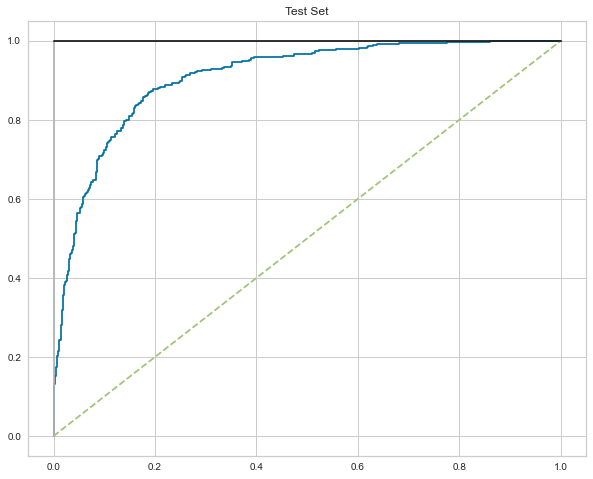

In [46]:
# Plot ROC curve
plt.title("Test Set")
plt.plot(false_positive_rate, true_positive_rate)
plt.plot([0, 1], Ls='--')
plt.plot([0, 0], [1, 0], c=".7"), plt.plot([1, 1], c=".1")
#plt.ylable("True Positive Rte")
#plt.xlable("False Positive Rte")
plt.show()

In [47]:
logreg = LogisticRegression(solver='lbfgs')

In [48]:
column_trans = make_column_transformer(
    (OneHotEncoder(), ['1st Road Class', 'Road Surface','Lighting Conditions', 'Weather Conditions',
                       'Casualty Class', 'Sex of Casualty', 'Type of Vehicle']), remainder= 'passthrough')
logreg = LogisticRegression(solver='lbfgs')

In [49]:
y.value_counts(normalize=True)

Slight     0.888206
Serious    0.102190
Fatal      0.009604
Name: Casualty Severity, dtype: float64

In [50]:
#create a simple pipeline using the Pipeline() class
pipe = Pipeline([('scaler', StandardScaler()), ('clf',LogisticRegression())])

In [51]:
#Model fitting with K-cross Validation and GridSearchCV
knn = KNeighborsClassifier()
from sklearn.model_selection import GridSearchCV
k_range = list(range(1, 31))
param_grid = dict(n_neighbors=k_range)
  
# defining parameter range
grid = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy', return_train_score=False,verbose=1)
  
# fitting the model for grid search
grid_search=grid.fit(X_train, y_train)

Fitting 10 folds for each of 30 candidates, totalling 300 fits


In [52]:
print(grid_search.best_params_)

{'n_neighbors': 13}


In [53]:
accuracy = grid_search.best_score_ *100
print("Accuracy for our training dataset with tuning is : {:.2f}%".format(accuracy) )

Accuracy for our training dataset with tuning is : 88.66%


In [54]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, plot_confusion_matrix

In [55]:
#accuracy = grid_search.best_score_ *100
#print("Accuracy for our training dataset with tuning is : {:.2f}%".format(accuracy) )

C:\Users\Yousof\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


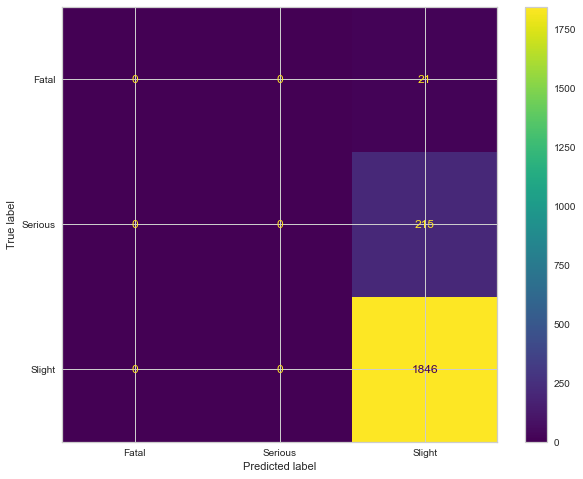

In [57]:
#Plotting a Confusion Matrix
plot_confusion_matrix(grid,X_train, y_train,values_format='d' )

In [60]:
#plot_confusion_matrix(grid,X_test, y_test,values_format='d' )

### Conclusions

$\bullet$ Road Surface play an important role in predicting in Casualty Severity <br>
$\bullet$ Accuracy for our training dataset with tuning is $89.34\%$ accuracy <br>
$\bullet$ Road Surface,Lighting Conditions,Weather Conditions, and Casualty Class are useful in predicting Casualty Severity
$\bullet$ Because of categorical features KNN model and metric makes sense for my problem